# Generating Samples from a Multivariate Gaussian Distribution

It's been a while since I've read through multi-variate statistics notation so when I came across this expression

$$
\mathcal{N}((0, 1)^T, \mathbf{I})
$$

in Chapter 2 of [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/), I had to pause and dig into what the authors were trying to express.

For a second, I thought that the $(0, 1)^T$ was the term that contained information on both the mean and the standard deviation of the distribution. (Namely, that the first term $0$ was the mean and the second term $1$ was the standard deviation. However, this was a mistake. It turns out that $(0, 1)^T$ is the *mean* of the distribution itself, except in two dimensions. In the two variable case, the mean is $0$ for $X_1$ whereas for $X_2$ the mean is $1$. Additionally, $\mathbf{I}$ is the identity matrix in two dimensions, namely

$$
\left( \begin{array}{cc}
1 & 0 \\
0 & 1 
\end{array} \right)
$$

As a refresher on this, [Michael I. Jordan](https://people.eecs.berkeley.edu/~jordan/) has a great [book chapter](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf) on the subject.

In the multivariate case, the Gaussian distribution is defined by

$$
P(x|\mu, \Sigma) = \frac{1}{(2\pi)^{n/2}\det{\Sigma}} \exp{\big\{- \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\big\} }
$$

where $\mu$ is the multivariate mean and $\Sigma$ is the covariance of the different variables. 

In Python, Scipy has [a module](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) that makes it easier to work with multivariate Gaussian distributions. With these available tools and background, we can proceed to reproduce a dataset like the one mentioned in Chapter 2 of ESL. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline

The dataset was constructed by first generating a random sample of 10 points each for the *blue* and *orange* classes centered at $\Bigl( \begin{matrix}  1 \\ 0  \end{matrix}\Bigr)$ and $\Bigl( \begin{matrix}  0 \\ 1  \end{matrix}\Bigr)$ respectively.

In [2]:
blue_rv = multivariate_normal(
    np.array([1, 0]).T, np.eye(2))

orange_rv = multivariate_normal(
    np.array([0, 1]).T, np.eye(2))

In [3]:
blue_means = []
orange_means = []

for _ in range(10):
    blue_means.append(blue_rv.rvs())
    orange_means.append(orange_rv.rvs())

Next, for 100 rounds, we pick one of the above means (call it $m$) at random (uniformly), and then generate a sample from the distribution $\mathcal{N}(m, \mathbf{I}/5)$

In [4]:
# For 100 rounds, for each blue and orange, generate a random sample

blue_samples = []
orange_samples = []

for _ in range(100):
    blue_m = random.choice(blue_means)
    orange_m = random.choice(orange_means)
    
    blue_samples.append(multivariate_normal(
            blue_m.T, np.eye(2) / 5).rvs())
    orange_samples.append(multivariate_normal(
            orange_m.T, np.eye(2) / 5).rvs())
    
    
blue_samples = np.array(blue_samples)
orange_samples = np.array(orange_samples)

Finally, we plot a figure with the results, which looks somewhat similar to the one presented in the textbook.

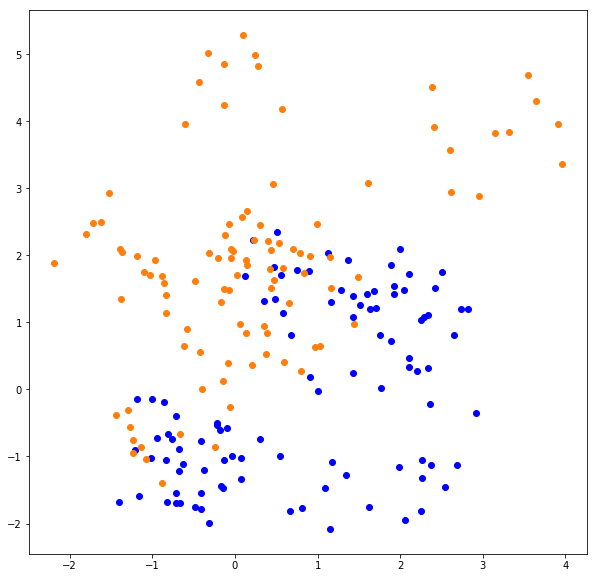

In [5]:
fig = plt.figure(figsize=(10, 10))

plt.plot(blue_samples[:, 0], blue_samples[:, 1], 'ob')
plt.plot(orange_samples[:, 0], orange_samples[:, 1], 'o', 
         color="tab:orange")